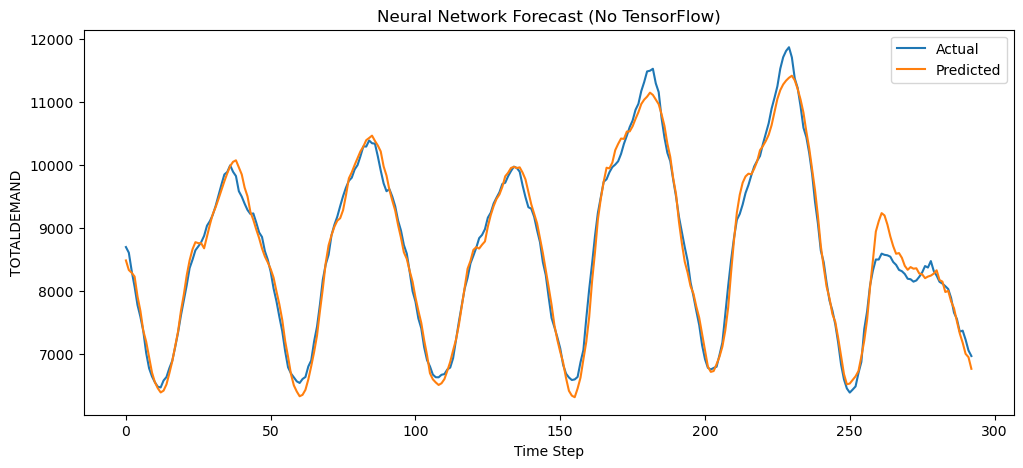

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

# Load your CSV
df = pd.read_csv("PRICE_AND_DEMAND_201801_NSW1.csv")
df['SETTLEMENTDATE'] = pd.to_datetime(df['SETTLEMENTDATE'], format='%Y/%m/%d %H:%M:%S')
df.set_index('SETTLEMENTDATE', inplace=True)

# Use TOTALDEMAND only
data = df[['TOTALDEMAND']].values

# Normalize
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create input-output pairs
def create_sequences(data, step=24):
    X, y = [], []
    for i in range(len(data) - step):
        X.append(data[i:i+step].flatten())  # Flatten for sklearn
        y.append(data[i+step])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled)

# Train/test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Neural network model
model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500)
model.fit(X_train, y_train.ravel())

# Predict
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title("Neural Network Forecast (No TensorFlow)")
plt.xlabel("Time Step")
plt.ylabel("TOTALDEMAND")
plt.legend()
plt.show()


In [3]:
!pip install tensorflow


     ---------------------------------------- 0.0/49.8 kB ? eta -:--:--
     ---------------------------------------- 49.8/49.8 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 3.4/376.0 MB 72.1 MB/s eta 0:00:06
    --------------------------------------- 8.7/376.0 MB 92.6 MB/s eta 0:00:04
   - -------------------------------------- 12.4/376.0 MB 93.0 MB/s eta 0:00:04
   - -------------------------------------- 16.8/376.0 MB 93.0 MB/s eta 0:00:04
   -- ------------------------------------ 22.4/376.0 MB 110.0 MB/s eta 0:00:04
   -- ------------------------------------ 27.8/376.0 MB 110.0 MB/s eta 0:00:04
   --- ----------------------------------- 33.1/376.0 MB 108.8 MB/s eta 0:00:04
   --- ----------------------------------- 38.2/376.0 MB 108.8 MB/s eta 0:00:04
   ---- ----------------------------------- 41.7/376.0 MB 93.9 MB/s eta 0:00:04
   ---- ----------------------------------- 46.3/376.0 MB 9